In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Module_IA_UM6P_LAHOUSSINE_BOUZZIT/LAB_03/data_industriel_classif.csv')

In [4]:
data.head()


,Mesure_1,Mesure_2,Température,Pression,Avec_Defaut
0,67.640523,32.779813,17.335395,115.932736,0
1,54.001572,34.462369,16.440149,105.687224,0
2,59.787380,27.888426,25.230675,98.855130,0
3,72.408932,30.523570,20.208128,102.516302,0
4,68.675580,31.140267,24.595942,87.891444,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mesure_1     1000 non-null   float64
 1   Mesure_2     1000 non-null   float64
 2   Température  1000 non-null   float64
 3   Pression     1000 non-null   float64
 4   Avec_Defaut  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [6]:
x= data.drop('Avec_Defaut', axis=1)
y=data['Avec_Defaut']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

résolution du problème avec les modèles machine learning

In [9]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', C=1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")


Random Forest: Accuracy = 0.98
Support Vector Machine: Accuracy = 0.91
K-Nearest Neighbors: Accuracy = 0.94
Decision Tree: Accuracy = 0.99


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.985


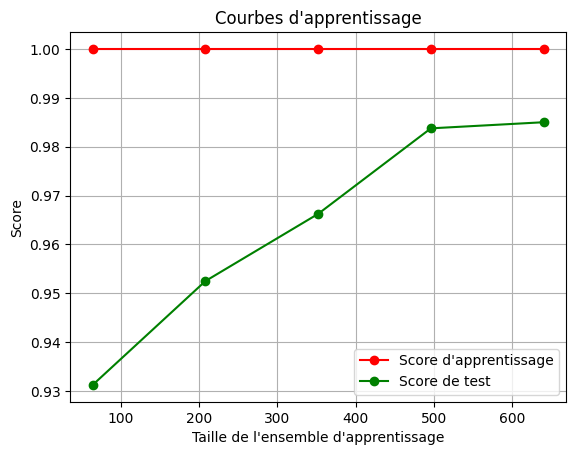

In [14]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.title("Courbes d'apprentissage")
plt.xlabel("Taille de l'ensemble d'apprentissage")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'apprentissage")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de test")

plt.legend(loc="best")
plt.show()



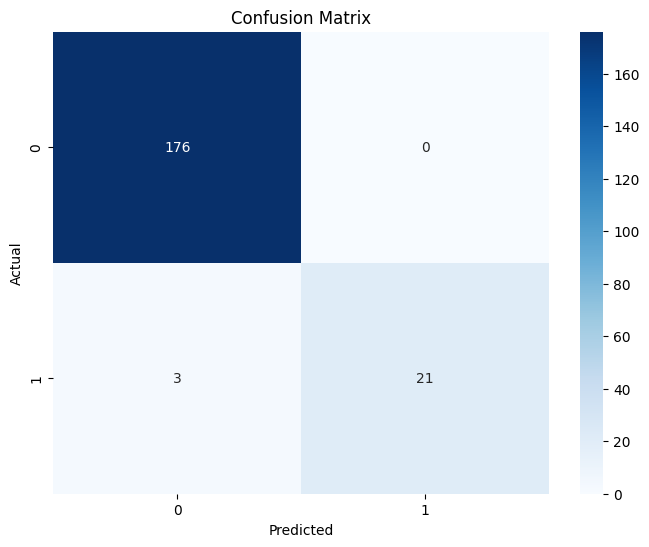

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Avec deep learning

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=100, verbose=0)

# Prédire les classes
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')


7/7 [==============================] - 0s 2ms/step
Accuracy: 0.89


In [ ]:
y_pred

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=100, verbose=0)

# Prédire les classes
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.96


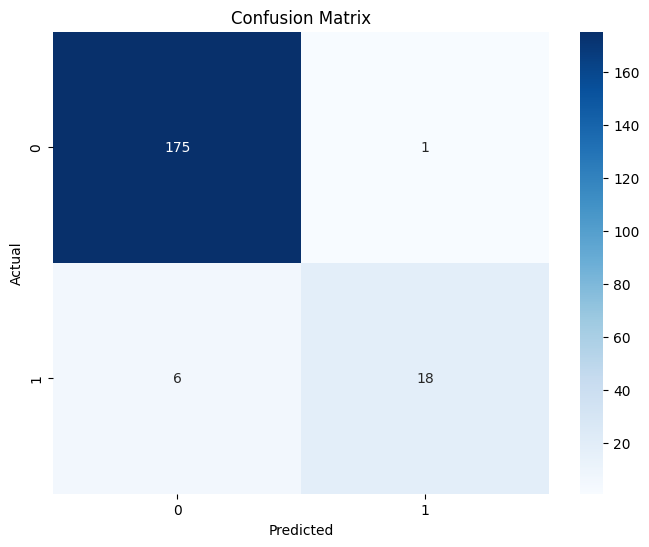

In [24]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

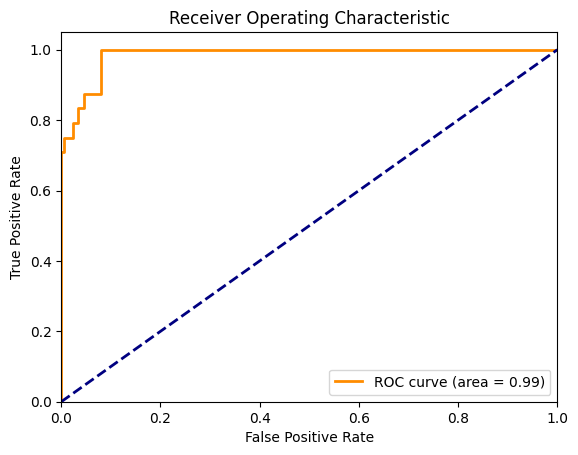

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

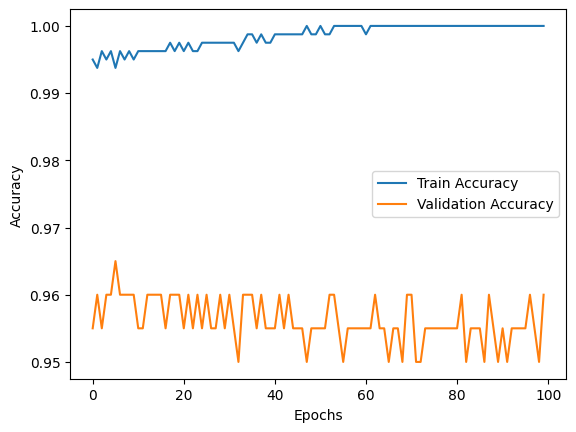

In [26]:
history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
